VBM683 Makine Öğrenmesi Term Paper - N21239069 - Sercan YILDIRIM


# Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/senanurbalcioglu/ev_fiyat_tahmini/main/dataset.csv')
df.head()

,Fiyat,Adres,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Türü,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı
0,"2,250,000TL",Adana - Aladağ - Ceritler Mahallesi,3+1,Belirtilmemiş,Isıtma Yok,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Boş,Hayır,Konut,Müstakil Ev,135 M2,0 (Yeni),2,Boş,Belirtilmemiş,2,1,Belirtilmemiş
1,"2,500,000TL",Adana - Aladağ - Ceritler Mahallesi,4+2,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,300 M2,16-20,2,Boş,Belirtilmemiş,2,Belirtilmemiş,Belirtilmemiş
2,"900,000TL",Adana - Aladağ - Ceritler Mahallesi,1 Oda,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,725 M2,21 Ve Üzeri,1,Boş,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş
3,"1,240,000TL",Adana - Ceyhan - Namık Kemal Mahallesi,2+1,5.Kat,Isıtma Yok,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Konut,Daire,87 M2,21 Ve Üzeri,5,Kiracı Oturuyor,Bilinmiyor,1,Belirtilmemiş,Belirtilmemiş
4,"4,800,000TL",Adana - Ceyhan - Şahin Özbilen Mahallesi,2+1,Yüksek Giriş,Klimalı,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Daire,120 M2,15-Nov,1,Kiracı Oturuyor,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154802 entries, 0 to 154801
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Fiyat               154802 non-null  object
 1   Adres               154802 non-null  object
 2   Oda Sayısı          154802 non-null  object
 3   Bulunduğu Kat       154802 non-null  object
 4   Isıtma Tipi         154802 non-null  object
 5   Krediye Uygunluk    154802 non-null  object
 6   Yapı Durumu         154802 non-null  object
 7   Tapu Durumu         154802 non-null  object
 8   Eşya Durumu         154802 non-null  object
 9   Site İçerisinde     154802 non-null  object
 10  Türü                154802 non-null  object
 11  Tipi                154802 non-null  object
 12  Brüt Metrekare      154802 non-null  object
 13  Binanın Yaşı        154802 non-null  object
 14  Binanın Kat Sayısı  154802 non-null  int64 
 15  Kullanım Durumu     154802 non-null  object
 16  Ya

In [ ]:
df.nunique()

Fiyat                 11250
Adres                  9104
Oda Sayısı               35
Bulunduğu Kat            54
Isıtma Tipi              21
Krediye Uygunluk          3
Yapı Durumu               4
Tapu Durumu               7
Eşya Durumu               3
Site İçerisinde           2
Türü                      1
Tipi                     15
Brüt Metrekare         1267
Binanın Yaşı              9
Binanın Kat Sayısı       60
Kullanım Durumu           3
Yatırıma Uygunluk         4
Banyo Sayısı              5
Balkon Sayısı             4
WC Sayısı                 8
dtype: int64

In [ ]:
df.columns

Index(['Fiyat', 'Adres', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Yapı Durumu', 'Tapu Durumu', 'Eşya Durumu',
       'Site İçerisinde', 'Türü', 'Tipi', 'Brüt Metrekare', 'Binanın Yaşı',
       'Binanın Kat Sayısı', 'Kullanım Durumu', 'Yatırıma Uygunluk',
       'Banyo Sayısı', 'Balkon Sayısı', 'WC Sayısı'],
      dtype='object')

# İl-İlçe-Mahalle Sutünu Oluşturma

In [ ]:
df["TireSayisi"] = df["Adres"].str.count('-')

In [ ]:
print(df[["Adres","TireSayisi"]].head())

                                      Adres  TireSayisi
0       Adana - Aladağ - Ceritler Mahallesi           2
1       Adana - Aladağ - Ceritler Mahallesi           2
2       Adana - Aladağ - Ceritler Mahallesi           2
3    Adana - Ceyhan - Namık Kemal Mahallesi           2
4  Adana - Ceyhan - Şahin Özbilen Mahallesi           2


In [ ]:
filtre = df["TireSayisi"] > 2

ikiden_fazla_tire_df = df[filtre]


In [ ]:
pd.set_option('display.max_rows', None)

""" ikiden fazla tire kullanılmış adreslerin hepsinde ikinci tireden sonraki
tirelerin bizim için anlamsız olduğundan emin olmak için tüm satırların görünür olması için bu kodu yazdık. """


' ikiden fazla tire kullanılmış adreslerin hepsinde ikinci tireden sonraki\ntirelerin bizim için anlamsız olduğundan emin olmak için tüm satırların görünür olması için bu kodu yazdık. '

In [ ]:
df_unique = ikiden_fazla_tire_df["Adres"].drop_duplicates()
print(df_unique)

3422                 Aydın - Didim - Ak - Yeniköy Mahallesi
4820      Aydın - Efeler - Hasanefendi - Ramazan Paşa Ma...
4923         Aydın - Efeler - Köprülü - Veysipaşa Mahallesi
18625     İstanbul - Bakırköy - Ataköy 7-8-9-10. Kısım M...
18627     İstanbul - Bakırköy - Ataköy 2-5-6. Kısım Maha...
18897     İstanbul - Bakırköy - Ataköy 3-4-11. Kısım Mah...
28092            İstanbul - Fatih - Hırka-i Şerif Mahallesi
44681          İstanbul - Üsküdar - Valide-i Atik Mahallesi
62153                      İzmir - Çiğli - Evka-5 Mahallesi
62166                    İzmir - Çiğli - Evka - 2 Mahallesi
62225                    İzmir - Çiğli - Evka - 6 Mahallesi
90883              Konya - Meram - Ateşbaz-I Veli Mahallesi
95956      Mersin - Akdeniz - Bağcılar - İhsaniye Mahallesi
108231    Balıkesir - Ayvalık - Fevzipaşa - Vehbibey Mah...
111431        Balıkesir - Karesi - Kuva-İ Milliye Mahallesi
112448    Bingöl - Bingöl Merkez - Selahaddin-i Eyyubi M...
123036          Gaziantep - Şahinbey - İ

In [ ]:
df[['Il', 'Ilce', 'Mahalle']] = df['Adres'].str.split(' - ', n=2, expand=True)

""" n = 2 ile tire sayısını bazı satırlar için 2 den fazla olabildiği için ikinciden sonraki tireleri
ayırmamasını sağlamış oluyoruz.
Expand = True ile yenis sütun oluşturması gerektiğini
"-" ile de tirelere göre split işlemini uygulaması gerektiğini bildiriyoruz. """

df[["Il","Ilce","Mahalle"]].head()

,Il,Ilce,Mahalle
0,Adana,Aladağ,Ceritler Mahallesi
1,Adana,Aladağ,Ceritler Mahallesi
2,Adana,Aladağ,Ceritler Mahallesi
3,Adana,Ceyhan,Namık Kemal Mahallesi
4,Adana,Ceyhan,Şahin Özbilen Mahallesi


In [ ]:
pd.reset_option('display.max_rows', 0) # Daha önce tüm satırları görmek istemiştik. Bu kod ile daha kısa çalışmasını sağlıyoruz.
df.columns

Index(['Fiyat', 'Adres', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Yapı Durumu', 'Tapu Durumu', 'Eşya Durumu',
       'Site İçerisinde', 'Türü', 'Tipi', 'Brüt Metrekare', 'Binanın Yaşı',
       'Binanın Kat Sayısı', 'Kullanım Durumu', 'Yatırıma Uygunluk',
       'Banyo Sayısı', 'Balkon Sayısı', 'WC Sayısı', 'TireSayisi', 'Il',
       'Ilce', 'Mahalle'],
      dtype='object')

In [ ]:
ankara_df = df.loc[df['Il'] == 'Ankara']
ankara_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11858 entries, 45973 to 57830
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fiyat               11858 non-null  object
 1   Adres               11858 non-null  object
 2   Oda Sayısı          11858 non-null  object
 3   Bulunduğu Kat       11858 non-null  object
 4   Isıtma Tipi         11858 non-null  object
 5   Krediye Uygunluk    11858 non-null  object
 6   Yapı Durumu         11858 non-null  object
 7   Tapu Durumu         11858 non-null  object
 8   Eşya Durumu         11858 non-null  object
 9   Site İçerisinde     11858 non-null  object
 10  Türü                11858 non-null  object
 11  Tipi                11858 non-null  object
 12  Brüt Metrekare      11858 non-null  object
 13  Binanın Yaşı        11858 non-null  object
 14  Binanın Kat Sayısı  11858 non-null  int64 
 15  Kullanım Durumu     11858 non-null  object
 16  Yatırıma Uygunluk   118

In [ ]:
print(ankara_df.shape) # verinin size bilgisini verir


(11858, 24)


In [ ]:
print(ankara_df.dtypes) # Veri tiplerinin bilgisini verir.

Fiyat                 object
Adres                 object
Oda Sayısı            object
Bulunduğu Kat         object
Isıtma Tipi           object
Krediye Uygunluk      object
Yapı Durumu           object
Tapu Durumu           object
Eşya Durumu           object
Site İçerisinde       object
Türü                  object
Tipi                  object
Brüt Metrekare        object
Binanın Yaşı          object
Binanın Kat Sayısı     int64
Kullanım Durumu       object
Yatırıma Uygunluk     object
Banyo Sayısı           int64
Balkon Sayısı         object
WC Sayısı             object
TireSayisi             int64
Il                    object
Ilce                  object
Mahalle               object
dtype: object


In [ ]:
print(ankara_df.describe().T) # Suütunlardaki başlıca istatistik değerlerini verir.

                      count      mean       std  min  25%  50%  75%   max
Binanın Kat Sayısı  11858.0  5.842301  4.966406  1.0  3.0  4.0  6.0  43.0
Banyo Sayısı        11858.0  1.461123  0.657290  1.0  1.0  1.0  2.0   5.0
TireSayisi          11858.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0


In [ ]:
print(ankara_df.corr(numeric_only=True))

                    Binanın Kat Sayısı  Banyo Sayısı  TireSayisi
Binanın Kat Sayısı            1.000000      0.244908         NaN
Banyo Sayısı                  0.244908      1.000000         NaN
TireSayisi                         NaN           NaN         NaN


In [ ]:
# Sütunların birbirleri üzerine ne derece etkili olduklarını gösterir.
""" Korelasyon bizim için önemli bir parametredir. Output olacak olan fiyat bilgisi üzerinde en etkili
olan input parametrelerinin tespit edilmesi aşamasında kullanılacaktır. """

' Korelasyon bizim için önemli bir parametredir. Output olacak olan fiyat bilgisi üzerinde en etkili\nolan input parametrelerinin tespit edilmesi aşamasında kullanılacaktır. '

<Axes: ylabel='Ilce'>

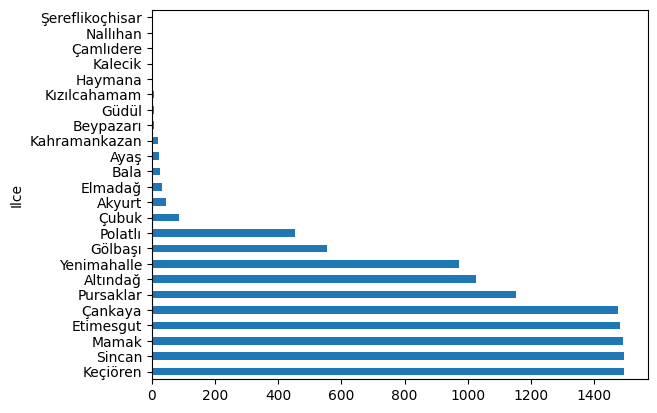

In [ ]:
ankara_df.Ilce.value_counts().plot.barh()

In [ ]:
ankara_df[ankara_df['Ilce'] == "Şereflikoçhisar"].describe()

,Binanın Kat Sayısı,Banyo Sayısı,TireSayisi
count,1.0,1.0,1.0
mean,3.0,1.0,2.0
std,NaN,NaN,NaN
min,3.0,1.0,2.0
25%,3.0,1.0,2.0
50%,3.0,1.0,2.0
75%,3.0,1.0,2.0
max,3.0,1.0,2.0


TL bilgisini sil
Ne kadar Sözel bilgi varsa(ordinal veya nominal) bunları pipline

  -- Simple inputer nicel(sayısal) verileri normalize ediyor.
  -- Nominal veri tipini OneHotEncoder ile normalleştir.
  -- Çokiyi - iyi - normal şeklindeki veri tipleri(ordinal) için:
    --- OrdinalEncoder ile normalleştir.

  Normalleştirme sonrası - sütun dönüştürme(column transformers) kullanılmalı
  --- ColumnTransformer metodun adı
  

In [ ]:
print(ankara_df.head(1).T)
print(ankara_df.info())

# Fiyat, Oda Sayısı, Bulunduğu Kat, Brüt Metrekare, Binanın Yaşı,
# Binanın Kat Sayısı**, Banyo Sayısı**, Balkon Sayısı, WC Sayısı
# sütunları numeric verilere çevrilecek.

print(ankara_df["Fiyat"].head(50))

                                                   45973
Fiyat                                          2300000TL
Adres               Ankara - Akyurt - Yıldırım Mahallesi
Oda Sayısı                                           3+1
Bulunduğu Kat                                      3.Kat
Isıtma Tipi                               Kombi Doğalgaz
Krediye Uygunluk                     Krediye Uygun Değil
Yapı Durumu                                Belirtilmemiş
Tapu Durumu                                Belirtilmemiş
Eşya Durumu                                          Boş
Site İçerisinde                                    Hayır
Türü                                               Konut
Tipi                                               Daire
Brüt Metrekare                                    130 M2
Binanın Yaşı                                    0 (Yeni)
Binanın Kat Sayısı                                     3
Kullanım Durumu                                      Boş
Yatırıma Uygunluk              

# Veri Düzenleme

In [ ]:
ankara_df["Fiyat"] = ankara_df["Fiyat"].str.replace("TL", "")

ankara_df["Fiyat"] = ankara_df["Fiyat"].apply(lambda x:x.rsplit("arrow", 1)[0].strip())

ankara_df["Brüt Metrekare"] = ankara_df["Brüt Metrekare"].str.replace(" M2", "")

print(ankara_df["Fiyat"].head(5))




45973    2300000
45974    7000000
45975    2650000
45976    2400000
45977    2470000
Name: Fiyat, dtype: object


In [ ]:
ankara_df["Fiyat"] = pd.to_numeric(ankara_df["Fiyat"])
ankara_df["Brüt Metrekare"] = pd.to_numeric(ankara_df["Brüt Metrekare"])
ankara_df["Brüt Metrekare"] = ankara_df["Brüt Metrekare"].astype(int)

In [ ]:
print(ankara_df.corr(numeric_only=True))

                       Fiyat  Brüt Metrekare  Binanın Kat Sayısı  \
Fiyat               1.000000        0.519844            0.178197   
Brüt Metrekare      0.519844        1.000000            0.089767   
Binanın Kat Sayısı  0.178197        0.089767            1.000000   
Banyo Sayısı        0.546542        0.622355            0.244908   
TireSayisi               NaN             NaN                 NaN   

                    Banyo Sayısı  TireSayisi  
Fiyat                   0.546542         NaN  
Brüt Metrekare          0.622355         NaN  
Binanın Kat Sayısı      0.244908         NaN  
Banyo Sayısı            1.000000         NaN  
TireSayisi                   NaN         NaN  


In [ ]:
ankara_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11858 entries, 45973 to 57830
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fiyat               11858 non-null  int64 
 1   Adres               11858 non-null  object
 2   Oda Sayısı          11858 non-null  object
 3   Bulunduğu Kat       11858 non-null  object
 4   Isıtma Tipi         11858 non-null  object
 5   Krediye Uygunluk    11858 non-null  object
 6   Yapı Durumu         11858 non-null  object
 7   Tapu Durumu         11858 non-null  object
 8   Eşya Durumu         11858 non-null  object
 9   Site İçerisinde     11858 non-null  object
 10  Türü                11858 non-null  object
 11  Tipi                11858 non-null  object
 12  Brüt Metrekare      11858 non-null  int64 
 13  Binanın Yaşı        11858 non-null  object
 14  Binanın Kat Sayısı  11858 non-null  int64 
 15  Kullanım Durumu     11858 non-null  object
 16  Yatırıma Uygunluk   118

In [ ]:
ankara_df.groupby("Isıtma Tipi").agg({"Fiyat":"mean"}).sort_values(by="Fiyat",ascending=False)

,Fiyat
Isıtma Tipi,
Yerden Isıtma,7.602982e+06
Klimalı,5.600365e+06
Kat Kaloriferi,4.845891e+06
Merkezi (Pay Ölçer),4.587735e+06
Doğalgaz Sobalı,4.540482e+06
Merkezi Doğalgaz,3.510865e+06
Güneş Enerjisi,3.367500e+06
Isıtma Yok,3.205946e+06
Sobalı,2.934096e+06


Gerekli, Çoğu bilgi içermeyen sütunların kaldırılma işlemi gerçekleştirilmiştir.

In [ ]:
ankara_df.drop(['Adres','Türü','Balkon Sayısı','WC Sayısı','Krediye Uygunluk','Yapı Durumu','Eşya Durumu','Site İçerisinde','Kullanım Durumu','Yatırıma Uygunluk','TireSayisi','Il','Mahalle','Tapu Durumu'] , axis= 1, inplace=True)

In [ ]:
# Sütunlardaki unique değerler drop edilmesi yada düzeltilmesi için değerlendirilmiştir.
for col in ankara_df.columns:
  print("------------")
  print(ankara_df[col].value_counts())
  print("------------")

------------
Fiyat
2500000    166
1750000    161
2100000    158
2250000    155
1650000    145
          ... 
8375000      1
1474000      1
1048000      1
22222        1
3539000      1
Name: count, Length: 1387, dtype: int64
------------
------------
Oda Sayısı
3+1       7074
4+1       1677
2+1       1658
1+1        408
5+1        336
6+1        125
5+2         92
4+2         82
6+2         73
3.5+1       64
4.5+1       59
7+1         44
2.5+1       24
3+2         23
7+2         23
Stüdyo      18
1 Oda       17
9+ Oda      13
1.5+1       10
3+0          7
8+2          7
8+3          4
2+2          4
8+1          4
4+0          3
5+3          3
5+0          1
6+3          1
4+3          1
2+0          1
5+4          1
7+3          1
Name: count, dtype: int64
------------
------------
Bulunduğu Kat
3.Kat                1904
1.Kat                1891
2.Kat                1861
Yüksek Giriş         1161
4.Kat                 874
Belirtilmemiş         547
Düz Giriş (Zemin)     507
Kot 1 (-1).

Oda Sayısı değişkenlerinin analizi gereksiz yormaması için sadeleştirme yapılmıştır.

In [ ]:
filt_oda=ankara_df["Oda Sayısı"].isin(["3+1","4+1","2+1","1+1"])

In [ ]:
filt=ankara_df["Brüt Metrekare"].value_counts()>500

In [ ]:
ankara_df.loc[~filt_oda,"Oda Sayısı"]="diger"

In [ ]:
ankara_df["Oda Sayısı"].unique()

array(['3+1', '4+1', 'diger', '1+1', '2+1'], dtype=object)

İlçe Bilgilerinden az sayıda olanlar için sadeleştirme yapılmıştır.

In [ ]:
filt_ilce=ankara_df["Ilce"].isin(["Keçiören","Sincan","Mamak","Etimesgut","Çankaya","Pursaklar","Altındağ","Yenimahalle","Gökbaşı","Polatlı"])

In [ ]:
ankara_df.loc[~filt_ilce,"Ilce"]="diger"

In [ ]:
ankara_df["Ilce"].unique()

array(['diger', 'Altındağ', 'Çankaya', 'Etimesgut', 'Keçiören', 'Mamak',
       'Polatlı', 'Pursaklar', 'Sincan', 'Yenimahalle'], dtype=object)

Bulunduğu kat sütunu için sadeleştirme işlemi yapılmıştır.

In [ ]:
filt_bulkat=ankara_df["Bulunduğu Kat"].isin(['3.Kat', '2.Kat', '1.Kat', '4.Kat', 'Yüksek Giriş'])

In [ ]:
ankara_df.loc[~filt_bulkat,"Bulunduğu Kat"]="diger katlar"

In [ ]:
ankara_df["Bulunduğu Kat"].unique().T

array(['3.Kat', 'diger katlar', '2.Kat', '1.Kat', '4.Kat', 'Yüksek Giriş'],
      dtype=object)

Binanın Kat Sayısı sütunu için sadeleştirme yapılmıştır.

In [ ]:
#filt_bulkat=ankara_df["Binanın Kat Sayısı"].isin([3,4,5,2])

In [ ]:
#ankara_df.loc[~filt_bulkat,"Binanın Kat Sayısı"] = "çok katlı"

In [ ]:
#ankara_df["Binanın Kat Sayısı"].unique().T

In [ ]:
#ankara_df["Binanın Kat Sayısı"] = ankara_df["Binanın Kat Sayısı"].astype(str)

In [ ]:
ankara_df["Brüt Metrekare"].unique().T

array([130, 200, 175, 550, 170, 110, 135,  50, 180, 500, 320,  46, 140,
       300, 421,  90, 420, 120, 100, 400, 105,   1, 275, 201, 230, 117,
       360, 145, 133, 125, 160,  98, 115,  70, 150,  85,  93, 250,  78,
        72, 189,  77, 190, 209, 245,  95,  80,  60, 155, 350, 167,  87,
       185, 210, 166, 235, 205, 165, 119, 220, 310, 390, 149, 255, 129,
       260,  65, 218, 172, 144, 128, 131, 126, 159, 169, 178, 270, 162,
        75, 181, 177, 122, 141, 171, 116, 153, 195, 147, 265, 240, 450,
         4, 531, 600,   3, 700, 455, 225, 650,  55, 114, 127, 330, 292,
       280,  74,  68, 216, 520, 137, 176, 285, 368, 124, 158, 198, 139,
       542, 234,  45, 254, 365, 138,  67,  66,  69,  41,  56, 290, 295,
       299,  47, 196, 111, 580, 219, 118, 340, 156, 203, 345,  43,  40,
        86,  63, 179, 315, 385, 430, 146, 560, 102, 112, 305, 415, 104,
       620, 148,  88, 207, 226,  57, 370, 215, 211, 197,  49, 142, 236,
       182,  82, 740, 242,  61,  71, 123, 380, 616,  59,  30, 32

In [ ]:
#ankara_df.groupby("Brüt Metrekare").agg({"Fiyat":"mean"}).sort_values(by="Fiyat",ascending=False)

In [ ]:
(ankara_df["Brüt Metrekare"]=="3+1").sum()

0

In [ ]:
ankara_df["Binanın Yaşı"] = ankara_df["Binanın Yaşı"].replace({"10-May":"7","15-Nov":"13","0 (Yeni)":"0","21 Ve Üzeri":"22","16-20":"18"})

print(ankara_df["Binanın Yaşı"].value_counts())

ankara_df["Binanın Yaşı"] = pd.to_numeric(ankara_df["Binanın Yaşı"])

Binanın Yaşı
7     2693
13    2172
0     2146
22    1972
18    1338
4      709
3      330
1      251
2      247
Name: count, dtype: int64


In [ ]:
ankara_df.reset_index

<bound method DataFrame.reset_index of          Fiyat Oda Sayısı Bulunduğu Kat       Isıtma Tipi   Tipi  \
45973  2300000        3+1         3.Kat    Kombi Doğalgaz  Daire   
45974  7000000        3+1  diger katlar            Sobalı  Villa   
45975  2650000        4+1         2.Kat    Kombi Doğalgaz  Daire   
45976  2400000      diger         1.Kat            Sobalı  Daire   
45977  2470000        4+1         4.Kat    Kombi Doğalgaz  Daire   
...        ...        ...           ...               ...    ...   
57826  1750000        2+1  Yüksek Giriş    Kombi Doğalgaz  Daire   
57827  2750000        3+1         1.Kat    Kombi Doğalgaz  Daire   
57828  3750000      diger  diger katlar    Kombi Doğalgaz  Daire   
57829  5750000      diger  diger katlar    Kombi Doğalgaz  Daire   
57830  5950000        4+1  diger katlar  Merkezi Doğalgaz  Daire   

       Brüt Metrekare  Binanın Yaşı  Binanın Kat Sayısı  Banyo Sayısı  \
45973             130             0                   3             2   
45974             200             0                   2             1   
45975             175             0                   3             2   
45976             550             1                   1             1   
45977             170             4                   4             2   
...               ...           ...                 ...           ...   
57826             110            13                   3             1   
57827             130            13                   3             1   
57828             400             7                   4             2   
57829             300             7                   7             3   
57830             200             0                  21             2   

              Ilce  
45973        diger  
45974        diger  
45975        diger  
45976        diger  
45977        diger  
...            ...  
57826  Yenimahalle  
57827  Yenimahalle  
57828  Yenimahalle  
57829  Yenimahalle  
57830  Yenimahalle  

[11858 rows x 10 columns]>

In [ ]:
ankara_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11858 entries, 45973 to 57830
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fiyat               11858 non-null  int64 
 1   Oda Sayısı          11858 non-null  object
 2   Bulunduğu Kat       11858 non-null  object
 3   Isıtma Tipi         11858 non-null  object
 4   Tipi                11858 non-null  object
 5   Brüt Metrekare      11858 non-null  int64 
 6   Binanın Yaşı        11858 non-null  int64 
 7   Binanın Kat Sayısı  11858 non-null  int64 
 8   Banyo Sayısı        11858 non-null  int64 
 9   Ilce                11858 non-null  object
dtypes: int64(5), object(5)
memory usage: 1019.0+ KB


# Veri Seti Doğrulaması

In [ ]:
fold_number = 10
test_size = 0.2
seed = 7
X = ankara_df.iloc[:, 1:10]
Y = ankara_df.iloc[:, 0]
kfold = KFold(n_splits=fold_number,shuffle=True,random_state=7)
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=test_size,random_state=seed)

In [ ]:
print(X)

      Oda Sayısı Bulunduğu Kat       Isıtma Tipi   Tipi  Brüt Metrekare  \
45973        3+1         3.Kat    Kombi Doğalgaz  Daire             130   
45974        3+1  diger katlar            Sobalı  Villa             200   
45975        4+1         2.Kat    Kombi Doğalgaz  Daire             175   
45976      diger         1.Kat            Sobalı  Daire             550   
45977        4+1         4.Kat    Kombi Doğalgaz  Daire             170   
...          ...           ...               ...    ...             ...   
57826        2+1  Yüksek Giriş    Kombi Doğalgaz  Daire             110   
57827        3+1         1.Kat    Kombi Doğalgaz  Daire             130   
57828      diger  diger katlar    Kombi Doğalgaz  Daire             400   
57829      diger  diger katlar    Kombi Doğalgaz  Daire             300   
57830        4+1  diger katlar  Merkezi Doğalgaz  Daire             200   

       Binanın Yaşı  Binanın Kat Sayısı  Banyo Sayısı         Ilce  
45973             0           

# Veri Tiplerini Belirleme ve Pipeline

**Nicel Veriye Sahip Sutünlar:** 'Banyo Sayısı','Brüt Metrekare','Binanın Yaşı',


**Nominal Veriye Sahip Sutünlar:** 'Bulunduğu Kat','Oda Sayısı',  'Isıtma Tipi', 'Tipi','Ilce'


----------



Tür / Adres  Sütununu sil

Brüt Metrekare m2 silinecek/ numeric yapılacak.

Banyo Sayısı, Binanın Kat Sayısı Elleme zaten İnteger

Fiyat kontrol et astype(İnteger) yapılarak çevrilebilir.

Fiyat  -- scaler

Balkon Sayısı - direk silinecek. Çünkü çoğu belirtilmemiş.

Binanın Yaşına ve Bulunduğu Kat 'a Bak


Filtreleme Yapılarak Noise Dataların temizlenmesi gerekmektedir.

In [ ]:
# Nicel veri tipine sahip sütunlar için oluşturulan Pipeline
quan_ss=StandardScaler()
quan_si=SimpleImputer()
quan_cols=['Banyo Sayısı','Binanın Yaşı','Brüt Metrekare']
quan_step=[("quan_si",quan_si),("quan_ss",quan_ss)]
quan_pipe=Pipeline(quan_step)

#Nominal veri tipine sahip sütunlar için oluşturulan Pipeline
nom_cols=[ 'Bulunduğu Kat','Oda Sayısı','Ilce','Binanın Kat Sayısı','Isıtma Tipi','Tipi']
nom_ohe=OneHotEncoder(sparse=False,handle_unknown="ignore")
nom_si=SimpleImputer(strategy="most_frequent")
nom_step=[("nom_si",nom_si),("nom_ohe",nom_ohe)]
nom_pipe=Pipeline(nom_step)



Ordinal veri tipine sahip sütunlar için oluşturulan Pipeline
order = [['Po', 'Fa', 'TA', 'Gd', 'Ex']]
ord_cols=["HeatingQC"]
ord_oe=OrdinalEncoder(order)
ord_si=SimpleImputer(strategy="most_frequent")
ord_step=[("ord_si",ord_si),("ord_oe",ord_oe)]
ord_pipe=Pipeline(ord_step)


# Sütun Dönüştürme İşlemleri

In [ ]:
#Sütun Dönüşüm Modellemesi

transformers=[("quan",quan_pipe,quan_cols),
             ("nom",nom_pipe,nom_cols)]
ct = ColumnTransformer(transformers,remainder="passthrough")
X_transformed = ct.fit_transform(X)



# Lineer vs NonLineer Modeller

In [ ]:
models=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),Ridge()]
model=[]
results=[]
names=[str(i).strip("()") for i in models ]
model_name=[]

In [ ]:
results=[]
name_models=[]
for i in models:
  X_transformed_columns=ct.fit_transform(X_train)
  X_validation_Transformed=ct.transform(X_validation)
  kf=KFold(n_splits=5,shuffle=True,random_state=7)
  final_model=i
  final_model.fit(X_transformed_columns,Y_train)
  mean_score=cross_val_score(final_model,X_validation_Transformed,Y_validation,cv=kf).mean()
  results.append(mean_score)
  name_models.append(str(i))
  print("Obtained mean score is {} for the model {}".format(mean_score,i))


Obtained mean score is -3.7328398003710633e+18for the model LinearRegression()
Obtained mean score is 0.2610603058087005for the model DecisionTreeRegressor()
Obtained mean score is -0.05773658824353482for the model SVR()
Obtained mean score is 0.5956384923773804for the model KNeighborsRegressor()
Obtained mean score is 0.5678950801717345for the model Ridge()
